Introduction
=============
This is a simple toy model intended for qualitative studies of virus spread. Similar results have been shared many time, but I wanted to describe the dynamics using my own terminology and using data that are available to the public. The model is intentionally quite verbose to make it more instructive.


Background
=============
Assume that an individual can have one of four states namely healthy, infected, recovered or dead. Recovered individuals are healthy as such, but cannot be infected again. The rate of change in the healthy population $\dot{H}$ can be written

$$\dot{H} = -\dot{I}_{+} = -2 E \tau p_{\rm{t}} I H = -k_{\rm{I+}} I H, $$

where the dot symbolizes a time derivative. $\dot{I}_{+}$ is the contribution per unit time to the infected population $I$ from the healthy individuals becoming infected. The product $I H$ is related to the probability of the exposure occuring between an infected individual and a healthy individual. $E$ is the number exposures per unit time, $\tau$ is the characteristic duration of the infection and $p_{\rm{t}}$ is the probability of the infection being transmitted. Thus, $Ep_{\rm{t}}$ is the expected value for the infectious exposures per unit time. The factor of 2 comes from the fact that the infection can be transmitted both when an infected individual meets a healthy individual and vice versa. Imagine a population with 50 % infected individuals ($I$) and 50 % healthy individuals ($H$). Then the total probability of an encounter between an infected individual and a healthy individual is $ I H +  H I = 2\cdot 0.25 = 0.5$.

The best model for the disappeaance of infection cases, that is recoveries plus deaths, that I could come up with is a simple exponential decay i.e. 

$$ \dot{I}_{-} = k_{\rm{I-}} I .$$

The subscript on $I_{-}$ indicates that it is only contributions to the infected population arising from infection cases disappearing. We can define the characteristic infection time $\tau$ as the time where e.g. 80 % of the infected individuals have recovered or died. Then $k_{\rm{I-}} = \log_e(1 - 0.8) = -1.609$. From $\dot{I}_{-}$ the recovery rate can be defined as


$$\dot{R} = p_{\rm{r}} \dot{I}_{-}, $$


where $p_{\rm{r}}$ is the proportion of infected individuals that will recover. Similarly, the rate of change in the dead population can be written

$$ \dot{D} = p_{\rm{d}} \dot{I}_{-} ,$$

where $p_{\rm{d}}$ is the proportion of infected individuals that will die. Since there are only two possible outcomes from an infection namely recovery or death we have $p_{\rm{r}} + p_{\rm{d}} = 1$. With these definitions, recovery and death happens at the same timescale. The total population count is preserved (including deads) and therefore the rate of change in the infected individuals can be written

$$ \dot{I} = \dot{I_{+}} + \dot{I_{-}} = -\dot{H} + \dot{R} + \dot{D} .$$

By solving these coupled ordinary differential equations the infection dynamics can be simulated. 

In addition to the states introduced above the infected individuals that require hospitalization $I_{\rm{h}} = p_{\rm{h}} I$ as well as infected individuals that require mechanical ventilation $I_{\rm{v}} = p_{\rm{v}} I_{\rm{h}}$ are calculated. 
$p_{\rm{h}}$ is the fraction of infected individuals that require hospitalization and $p_{\rm{v}}$ is the fraction of infected and hospitalized individuals that require mechanical ventilation. The proportion of infected individuals that will die if they require mechanical ventilation, but a ventilator is not available is $p_{\rm{d,nv}}$. If a ventilator is available this propotion is $p_{\rm{d}}$ as for the remaining infected population.


Limitations
--------------------
Some of the limitations in the model are listed below:

* no collateral effects are accounted for i.e. general scarcity of ambulances, health personnel, masks etc.,
* some couplings are neglected e.g. all infected individuals encounter $E$ individuals even if sick or hospitalized, and
* the parameters are not very accurate.

None of these simplifications will limit the learnings from this excersice.


Results & discussion
==============

Flu simulation
-------------------
First let us run a flu simulation for Denmark assuming a population of 5 milion. The flu parameters are estimated from [CDC](https://www.cdc.gov/flu/about/burden/preliminary-in-season-estimates.htm). The factorization of $k_{\rm{I+}}$ is not important for the solution, but let us attempt to factorize it to get a better feel for the orders of magnitude involved. Based on personal experience, I fix $E$ to 50 and further set the infection time for a flu to seven days. Then I adjust the transmission probability $p_{\rm{t}}$, which is more difficult to assert, to fit the actual number of [fatalities due to flu in Denmark](https://www.ssi.dk/sygdomme-beredskab-og-forskning/sygdomsovervaagning/i/influenzasaesonen---opgoerelse-over-sygdomsforekomst-2018-19). The results are shown below.

--------------------------------
Parameters
--------------------------------
Encounters per day        50 
Population           5000000 
Ventilators             1000 
Sick at day 0              5 
Infection time τ           7 day
k_I+                    1.82 /τ
k_I-                    1.61 /τ
k_I+ / k_I-             1.13 
Infections at τ (%)     20.0 %
p_t                      0.3 %
p_h                      1.3 %
p_d                      0.1 %
p_v                      0.0 %
p_d,nv                   0.0 %
--------------------------------


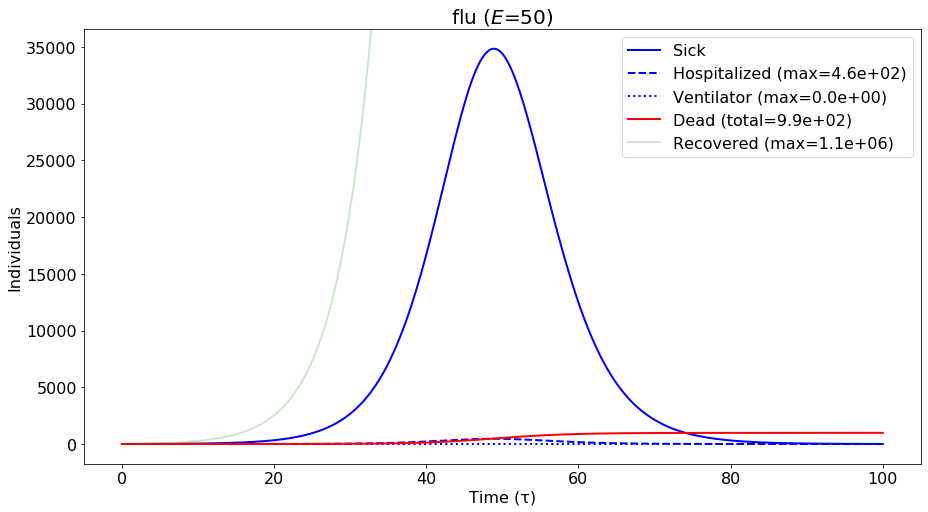

In [1]:
from src import countries
encounters_per_day = 50
countries.run_country('flu', 'denmark', encounters_per_day)

We see that the flu season results in $10^3$ deaths and lasts for 20-30 weeks. At its maximum a little over $3.5\cdot10^3$ people will be infected and $0.5\cdot10^3$ will be hospitalized. About 20 % of the population will be infected.

COVID-19 simulation (no intervension)
-------------
For the COVID-19 simulation with no intervention I use the same parameters as in the flu simulation except the infection time has been increased from seven days to 14 days, which is a frequently mentioned number for quarantine period. Further, $p_{\rm{d}}$ is estimated to lie in the range 0.5 to 1 % (see e.g. [here](https://www.bbc.com/news/health-51674743) or [here](https://edition.cnn.com/2020/03/30/health/coronavirus-lower-death-rate/index.html) ). Here we will use 0.5 % which gives a lower bound for the number of fatalities. Note that I have not increased the transmission probability only the infection time, which will, in turn, increase the number of healthy individuals an infected individual will encounter.

--------------------------------
Parameters
--------------------------------
Encounters per day        50 
Population           5000000 
Ventilators             1000 
Sick at day 0              5 
Infection time τ          14 day
k_I+                    3.64 /τ
k_I-                    1.61 /τ
k_I+ / k_I-             2.26 
Infections at τ (%)     20.0 %
p_t                      0.3 %
p_h                      1.3 %
p_d                      0.5 %
p_v                     20.0 %
p_d,nv                  90.0 %
--------------------------------


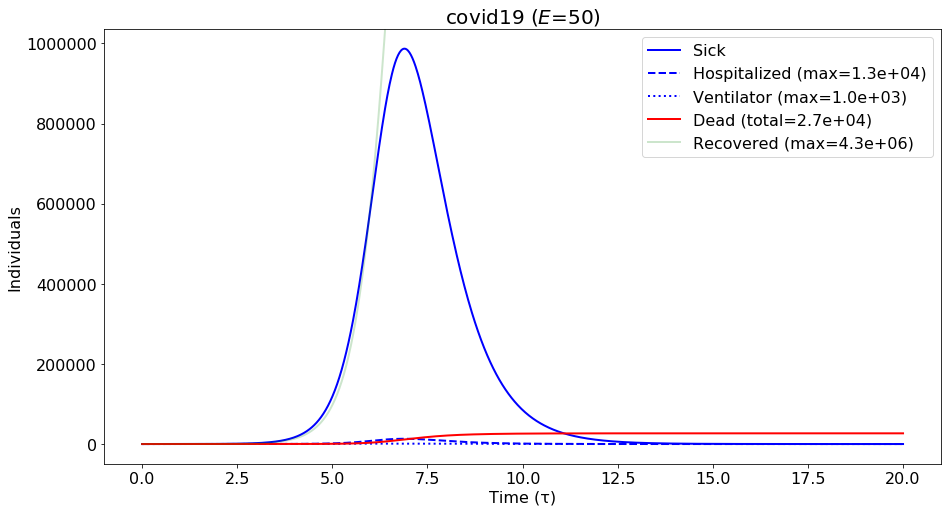

In [2]:
countries.run_country('covid19', 'denmark', encounters_per_day)

With no intervention the COVID-19 epidemic is, in this scenario, predicted to last about 70 days and results in $2.6\cdot10^3$ deaths. We have used $p_{\rm{v}}$ = 20 % and $p_{\rm{d,nv}}$ = 90 %. In other words [20 % of the hospitalized individuals require mechanical ventilation](https://jv.dk/artikel/fakta-sådan-udvikler-corona-indlæggelser-sig-2020-3-29) and 90 % of infected individual that require a mechanical ventilation will die if no ventilator is available. The value of $p_{\rm{d,nv}}$ is a number that I made up without any credible references. With no limit on the number of ventilators the death count would  $2.3\cdot10^3$ (data not shown). About 80 % of the population will be infected.

COVID-19 simulation (flattened)
================================
Social distancing. Reduce encounters per day from 50 to 35.

$k_{\rm{I+}} / k_{\rm{I-}}$ drops from 2.26 (no intervension) to 1.58

--------------------------------
Parameters
--------------------------------
Encounters per day        35 
Population           5000000 
Ventilators             1000 
Sick at day 0              5 
Infection time τ          14 day
k_I+                    2.55 /τ
k_I-                    1.61 /τ
k_I+ / k_I-             1.58 
Infections at τ (%)     20.0 %
p_t                      0.3 %
p_h                      1.3 %
p_d                      0.5 %
p_v                     20.0 %
p_d,nv                  90.0 %
--------------------------------


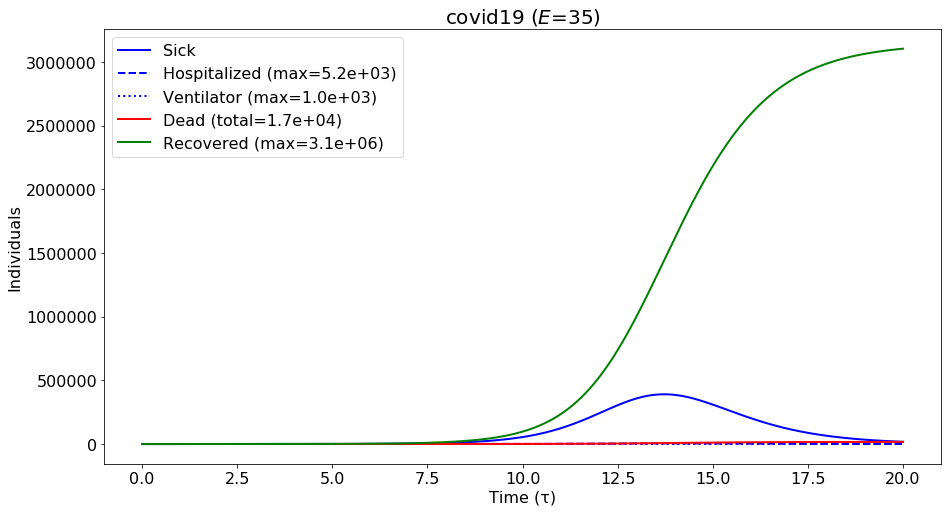

In [3]:
encounters_per_day = 35
countries.run_country('covid19', 'denmark', encounters_per_day, show_recovered=True)

COVID-19 simulation (damped)
================================
Bla bla quarantine

$k_{\rm{I+}} / k_{\rm{I-}}$ drops from 2.26 (no intervension) to 0.68. Since this ratio is less than unity the infection count steadily drop toward zero.  

--------------------------------
Parameters
--------------------------------
Encounters per day        15 
Population           5000000 
Ventilators             1000 
Sick at day 0              5 
Infection time τ          14 day
k_I+                    1.09 /τ
k_I-                    1.61 /τ
k_I+ / k_I-             0.68 
Infections at τ (%)     20.0 %
p_t                      0.3 %
p_h                      1.3 %
p_d                      0.5 %
p_v                     20.0 %
p_d,nv                  90.0 %
--------------------------------


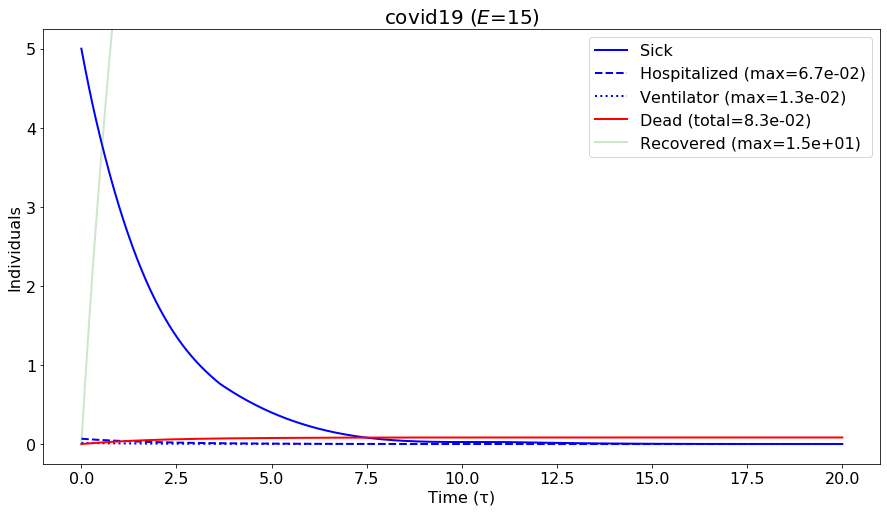

In [4]:
encounters_per_day = 15
countries.run_country('covid19', 'denmark', encounters_per_day)